In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import seaborn as sns; sns.set()

In [2]:
def read_fits(filename):
    """
    Read datacube
    Input: filname and the y and x boundaries: limits = [ymin,ymax,xmin,xmax]
    """
    fits_cube_read = fits.open(filename)
    cube, hdr, var = fits_cube_read[0].data, fits_cube_read[0].header, fits_cube_read[1].data

    """
    Calibrate in wavelength from header keywords
    """
    cdelt3 = hdr['CDELT3'] # the scale
    crval3 = hdr['CRVAL3'] # the starting wavelength
    naxis3 = hdr['NAXIS3'] # the length of the axis
    pixel = np.arange(cube.shape[0])
    lamb = crval3 + (pixel) * cdelt3 #the wavelength ranges
    lamRange =  [crval3 + 0,crval3 + cdelt3*(naxis3-1)] # the first and last wavelength of the spectrum

    return (cube, hdr, var, lamb, lamRange)

In [3]:
filename = 'data/100162/100162_cube_red.fits.gz'
cube, hdr, var, lamb, lamRange = read_fits(filename)

In [4]:
lamb

array([6844.70444553, 6845.29555447, 6845.88666341, ..., 8053.52222765,
       8054.11333659, 8054.70444553])

In [5]:
lamb.shape

(2048,)

In [6]:
file_name = 'data/100162/100162_cube_red.fits.gz'
cube_red, hdr_red, var_red, lamb_red, lamRange_red = read_fits(file_name)

In [7]:
central_flux = cube_red[:,25,25] 

In [8]:
central_flux[1000]

0.05767299282153364

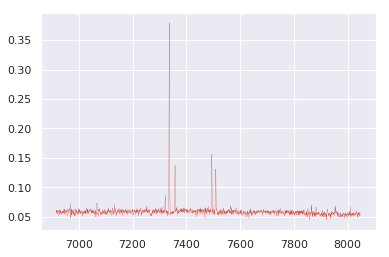

In [9]:
plt.plot(lamb, central_flux, sns.xkcd_rgb["pale red"], linewidth = 0.3)

In [10]:
gasvelocity_fits = 'data/100162/100162_gas-velocity_default_recom-comp.fits'
gasvelocity = fits.open(gasvelocity_fits)

In [11]:
gasvelocity.info()

Filename: data/100162/100162_gas-velocity_default_recom-comp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   (50, 50, 3)   float64   
  1  V_ERR         1 ImageHDU        21   (50, 50, 3)   float32   


In [12]:
gas_veloctiy = gasvelocity[0].data

In [13]:
gas_veloctiy[0,25,25]

-0.5154096496407874

In [14]:
lamb[0]

6844.70444553

In [15]:
lamb[0] * ( 1 + ( gas_veloctiy[0,25,25] / 300000 ))

6844.6926861076

In [16]:
lamb[1]

6845.2955544699125

In [17]:
'''
the small shift in each slice is less than the resolution from slice-to-slice
same flux will be taken at each spaxel separately, as before
new wavelength shift will be stored separately (each slice's shift left/right)
new diff function needed here? where lambda is different but the flux is the same
i.e. new wavelength information needing to be accounted for when "diff-ing" 
'''

'\nthe small shift in each slice is less than the resolution from slice-to-slice\nsame flux will be taken at each spaxel separately, as before\nnew wavelength shift will be stored separately (each slice\'s shift left/right)\nnew diff function needed here? where lambda is different but the flux is the same\ni.e. new wavelength information needing to be accounted for when "diff-ing" \n'

In [19]:
'''
1. read in red_cube and gas_velocity files
info needed from red_cube:
- header keywords for wavelength information
- flux in each spaxel
info needed from gas_velocity:
- gas_velocity at each spaxel
2. create empty wavelength array for new lambda values
3. at each spaxel, use the header keywords to create new
   wavelength at each slice by shifting by velocity
4. store updated wavelength in array
'''

'\n1. read in red_cube and gas_velocity files\ninfo needed from red_cube:\n- header keywords for wavelength information\n- flux in each spaxel\ninfo needed from gas_velocity:\n- gas_velocity at each spaxel\n2. create empty wavelength array for new lambda values\n3. at each spaxel, use the header keywords to create new\n   wavelength at each slice by shifting by velocity\n4. store updated wavelength in array\n'

In [24]:
def wavelength_gas_vel(red_cube, gas_velocity):
    
    L = 50
    
    red_flux_data = fits.open(red_cube)
    cube = red_flux_data[0].data
    hdr = red_flux_data[0].header
    cdelt3 = hdr['CDELT3'] # the scale
    crval3 = hdr['CRVAL3'] # the starting wavelength
    naxis3 = hdr['NAXIS3'] # the length of the axis
    pixel = np.arange(cube.shape[0])
    lamb = crval3 + (pixel) * cdelt3 #the wavelength ranges
    
    gasvelocity = fits.open(gas_velocity)  
    gas_veloctiy_2d = gasvelocity[0].data
    
    wavelength_array = np.zeros(shape=(2048,50,50))
    
    for i in range(L-1):
        for j in range(L-1):
            wavelength_array[:,i,j] = lamb[:] * ( 1 + ( gas_veloctiy[0,i,j] / 300000 ))
    
    return (wavelength_array)

In [25]:
red_cube = 'data/100162/100162_cube_red.fits.gz'

In [26]:
gas_velocity = 'data/100162/100162_gas-velocity_default_recom-comp.fits'

In [27]:
wavelength_array = wavelength_gas_vel(red_cube, gas_velocity)

In [28]:
wavelength_array[:,25,25]

array([6844.69268611, 6845.28379403, 6845.87490196, ..., 8053.50839144,
       8054.09949936, 8054.69060729])

In [31]:
lamb

array([6844.70444553, 6845.29555447, 6845.88666341, ..., 8053.52222765,
       8054.11333659, 8054.70444553])

(7320, 7360)

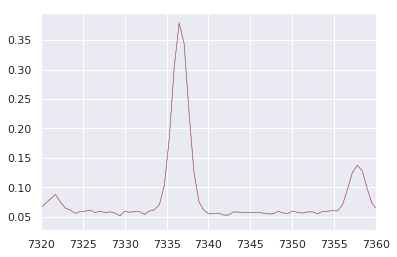

In [41]:
fig,ax = plt.subplots()
plt.plot(wavelength_array[:,25,25], central_flux, linewidth = 0.5)
plt.plot(lamb, central_flux, sns.xkcd_rgb["pale red"], linewidth = 0.5)
ax.set_xlim(7320, 7360)

(7320, 7360)

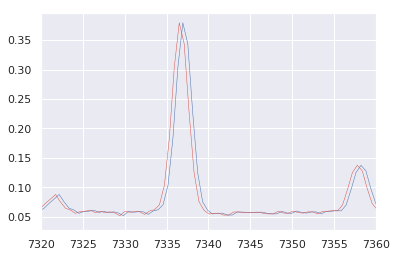

In [42]:
fig,ax = plt.subplots()
plt.plot(wavelength_array[:,30,30], central_flux, linewidth = 0.5)
plt.plot(lamb, central_flux, sns.xkcd_rgb["pale red"], linewidth = 0.5)
ax.set_xlim(7320, 7360)